# Testing - Explanation Credibility (Only Categorical Attribute)
## Attributes used to generate Rule : 8 Attributes
In this code, we aim to validate the explanations generated by the RDR model, which has been trained to imitate the original model. These explanations will be evaluated by an expert in the relevant field, specifically a **dentist**, to ensure its credibility.

* dataset : Dental implant failure
* source : https://doi.org/10.3390/app8050698
* Expert : Devy Yasodhara Lee

In [15]:
import sys
sys.path.append('../src/')
from rdr import RDR

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics

pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Import Model Libraries

In [17]:
from sklearn.ensemble import RandomForestClassifier

## 1. Load dataset

### 1.1. Load the dataset and store it in a variable named **df**

In [18]:
df = pd.read_csv("../data/dental_implant_failure.csv")
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           739 non-null    float64
 1   Gender                        747 non-null    int64  
 2   Systemic disease              741 non-null    float64
 3   Factors of missing            741 non-null    float64
 4   Tobacco smoking               719 non-null    float64
 5   Betel nut Chewing             719 non-null    float64
 6   Alcohol consumption           719 non-null    float64
 7   Departments                   744 non-null    float64
 8   Surgeon experience            744 non-null    float64
 9   Location of implant           747 non-null    int64  
 10  Bone density                  743 non-null    float64
 11  Timing of implant placement   740 non-null    float64
 12  Ridge augmentation            732 non-null    float64
 13  Maxil

None

### 1.2. Clean dataset

In [19]:
df.drop(columns=['Departments',
                 "Betel nut Chewing",
                 "Alcohol consumption",
                 "Surgeon experience",
                 "Angle of abutment"], inplace=True)
df.dropna(inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 746
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           700 non-null    float64
 1   Gender                        700 non-null    int64  
 2   Systemic disease              700 non-null    float64
 3   Factors of missing            700 non-null    float64
 4   Tobacco smoking               700 non-null    float64
 5   Betel nut Chewing             700 non-null    float64
 6   Alcohol consumption           700 non-null    float64
 7   Departments                   700 non-null    float64
 8   Surgeon experience            700 non-null    float64
 9   Location of implant           700 non-null    int64  
 10  Bone density                  700 non-null    float64
 11  Timing of implant placement   700 non-null    float64
 12  Ridge augmentation            700 non-null    float64
 13  Maxillary 

None

## 2. Create RDR model

### 2.1. Define categorical attributes
number of categorical attributes : 16

In [20]:
categorical_attr = [
    "Gender",
    "Systemic disease",
    "Factors of missing",
    "Tobacco smoking",
    "Location of implant",
    "Bone density",
    "Timing of implant placement",
    "Ridge augmentation",
    "Maxillary sinus augmentation",
    "Implant system",
    "Types of prosthesis",
    "Prosthesis fixation",
    "Dental implant failure"]

df = df[categorical_attr]

### 2.2. Define features and label and split dataset
train/test ratio = 80 : 20

In [21]:
label = df['Dental implant failure']
features = df.drop('Dental implant failure', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=42)

### 2.3. Oversampling with Synthetic Minority Oversampling Technique (SMOTE) to balance the train dataset

In [22]:
print(f"Before oversampling :\n{y_train.value_counts()}\n")

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

print(f"After oversampling :\n{y_train.value_counts()}\n")

Before oversampling :
Dental implant failure
1    486
0     74
Name: count, dtype: int64

After oversampling :
Dental implant failure
1    486
0    486
Name: count, dtype: int64



### 2.4. Train Decision Tree Classifier model

In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### 2.5. Create Prediction dataset
Use the original dataset to make predictions with the decision tree classifier (dtf).

In [24]:
predicted_label = rf.predict(features)

### 2.6. Train RDR model by using original dataset and predicted label

In [25]:
rdr = RDR(
        antecedent="1",
        categorical_attr=categorical_attr,
        total_precedent= 8)

rf_rdr = rdr.fit(features, pd.DataFrame(predicted_label))

In [26]:
# PREDICT USING DECISION TREE AND RDR
rf_pred = rf.predict(X_test)
rf_rdr_pred = rf_rdr.predict(X_test)

print(f"RF accuracy score: {metrics.accuracy_score(y_test, rf_pred)}")
print(f"RDR accuracy score: {metrics.accuracy_score(y_test, rf_rdr_pred)}")
print(f"RDR imitation accuracy score: {metrics.accuracy_score(rf_pred, rf_rdr_pred)}")

RF accuracy score: 0.8142857142857143
RDR accuracy score: 0.8142857142857143
RDR imitation accuracy score: 0.9857142857142858


In [27]:
sample = X_test.sample(20, random_state=5)
sample_label = y_test.loc[sample.index]

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
597,0,0.0,2.0,0.0,0.0,0.0,2,4.0,2.0,0.0,1.0,0,0.0,1.0,0.0


Index                   : 597
Predicted label         : [1]
Predicted label with RDR: [1.]


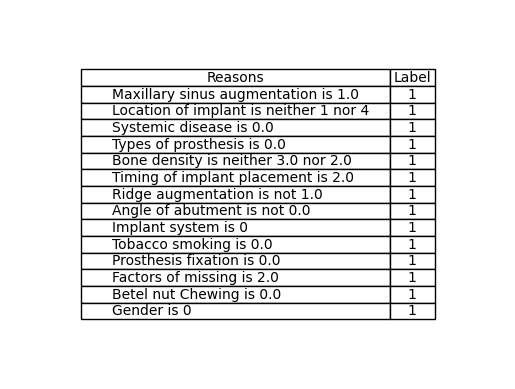

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
37,0,0.0,1.0,0.0,0.0,0.0,5,2.0,2.0,1.0,0.0,1,0.0,0.0,0.0


Index                   : 37
Predicted label         : [0]
Predicted label with RDR: [0.]


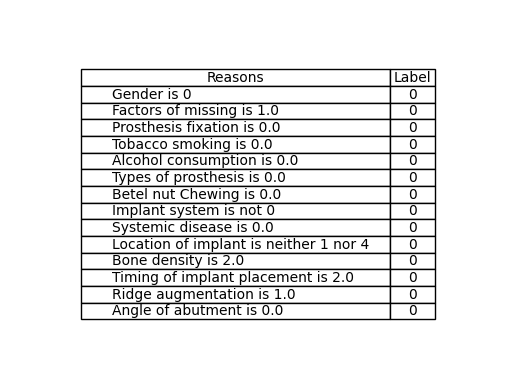

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
86,0,0.0,2.0,0.0,0.0,0.0,5,3.0,2.0,1.0,0.0,1,0.0,0.0,0.0


Index                   : 86
Predicted label         : [0]
Predicted label with RDR: [0.]


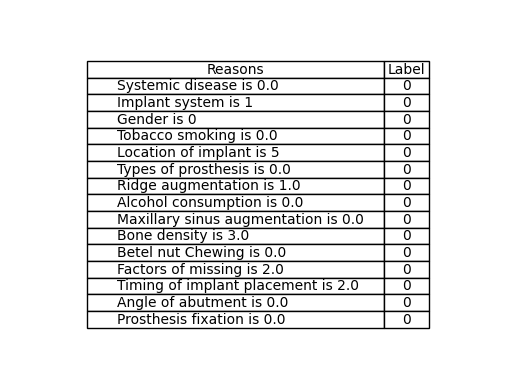

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
601,1,0.0,2.0,0.0,0.0,0.0,5,3.0,2.0,1.0,0.0,0,0.0,0.0,0.0


Index                   : 601
Predicted label         : [1]
Predicted label with RDR: [1.]


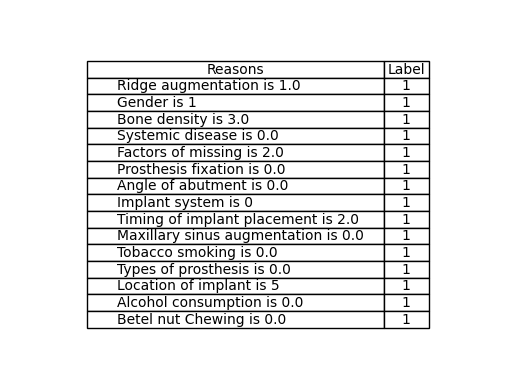

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
73,1,0.0,3.0,0.0,0.0,0.0,4,2.0,2.0,0.0,0.0,2,0.0,0.0,0.0


Index                   : 73
Predicted label         : [1]
Predicted label with RDR: [1.]


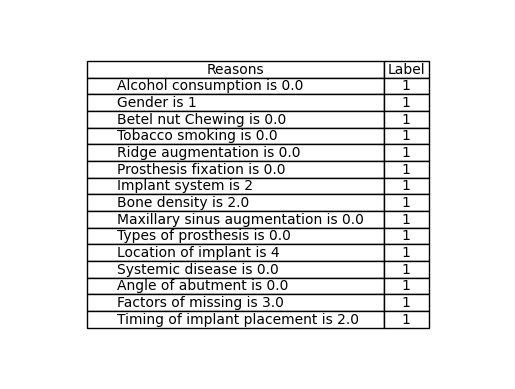

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
224,0,1.0,2.0,0.0,0.0,0.0,0,2.0,2.0,1.0,0.0,0,0.0,0.0,0.0


Index                   : 224
Predicted label         : [1]
Predicted label with RDR: [0.]


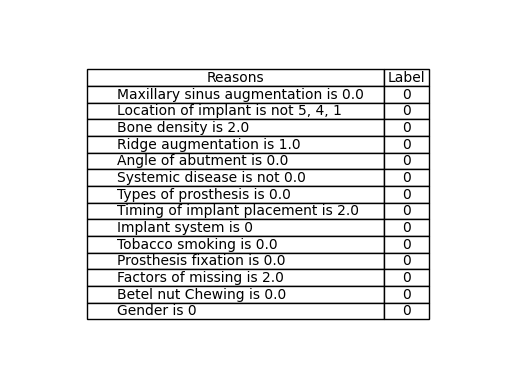

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
80,0,0.0,1.0,0.0,0.0,0.0,5,2.0,2.0,0.0,0.0,0,0.0,0.0,1.0


Index                   : 80
Predicted label         : [1]
Predicted label with RDR: [1.]


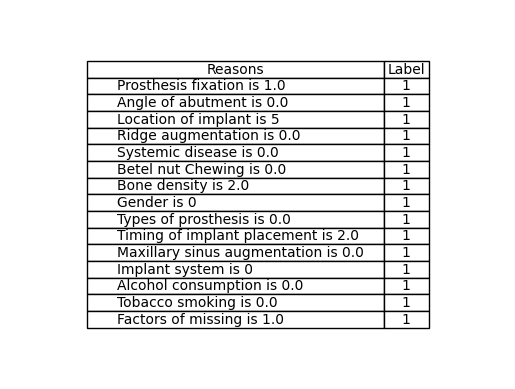

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
306,0,1.0,3.0,0.0,0.0,0.0,1,3.0,2.0,1.0,0.0,2,1.0,1.0,1.0


Index                   : 306
Predicted label         : [1]
Predicted label with RDR: [1.]


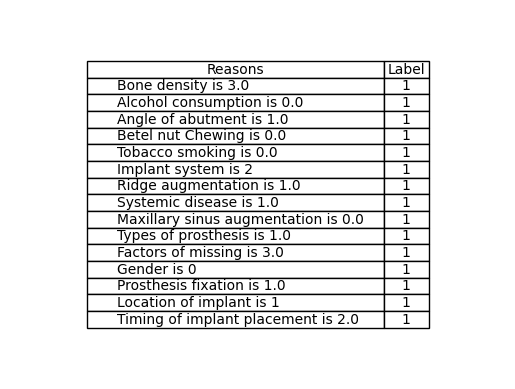

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
79,0,0.0,1.0,0.0,0.0,0.0,5,2.0,2.0,0.0,0.0,0,0.0,0.0,0.0


Index                   : 79
Predicted label         : [1]
Predicted label with RDR: [1.]


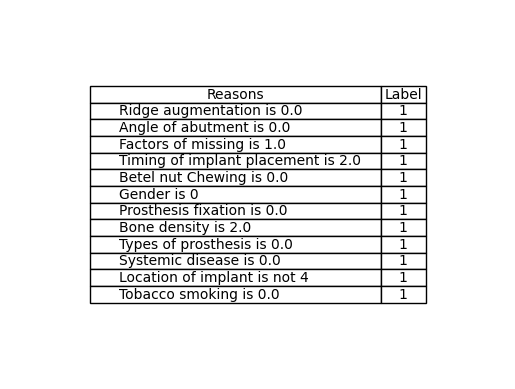

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
347,1,0.0,3.0,1.0,0.0,0.0,5,3.0,2.0,1.0,0.0,0,0.0,0.0,0.0


Index                   : 347
Predicted label         : [1]
Predicted label with RDR: [1.]


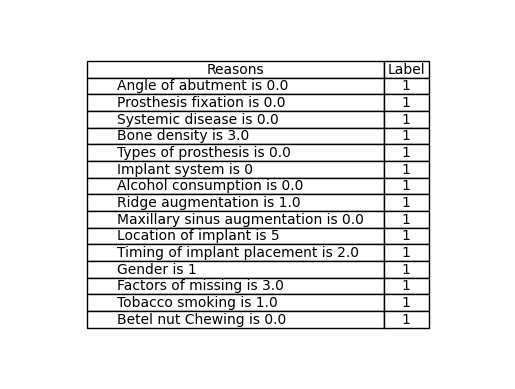

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
676,1,0.0,2.0,0.0,0.0,0.0,0,4.0,3.0,1.0,0.0,0,0.0,0.0,1.0


Index                   : 676
Predicted label         : [0]
Predicted label with RDR: [0.]


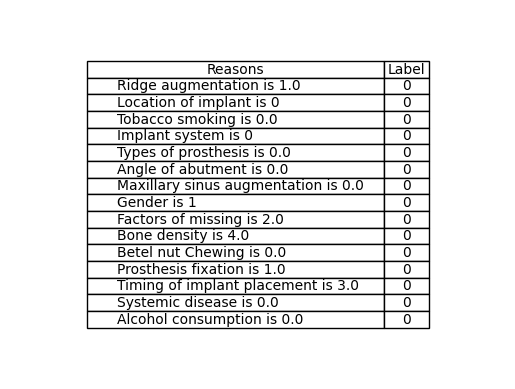

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
354,1,0.0,3.0,0.0,0.0,0.0,4,2.0,3.0,1.0,0.0,0,0.0,0.0,0.0


Index                   : 354
Predicted label         : [1]
Predicted label with RDR: [1.]


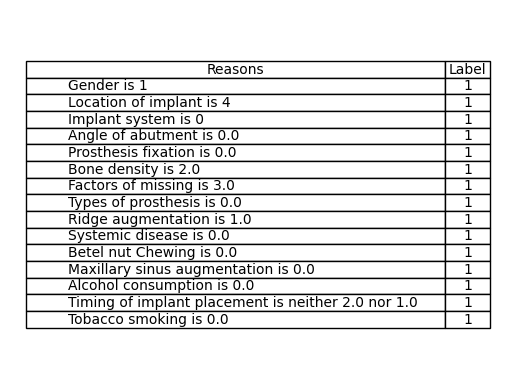

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
742,0,0.0,2.0,0.0,0.0,0.0,5,3.0,2.0,1.0,0.0,0,0.0,0.0,0.0


Index                   : 742
Predicted label         : [1]
Predicted label with RDR: [1.]


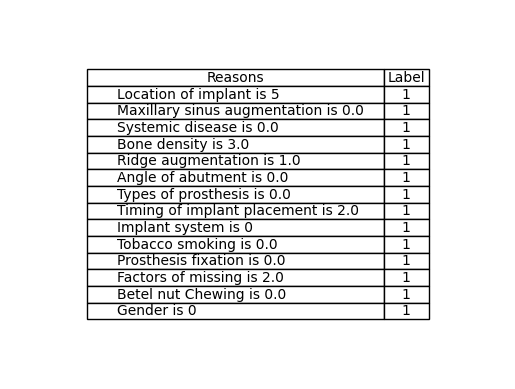

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
188,1,0.0,1.0,0.0,0.0,0.0,5,2.0,2.0,0.0,0.0,2,0.0,0.0,0.0


Index                   : 188
Predicted label         : [1]
Predicted label with RDR: [1.]


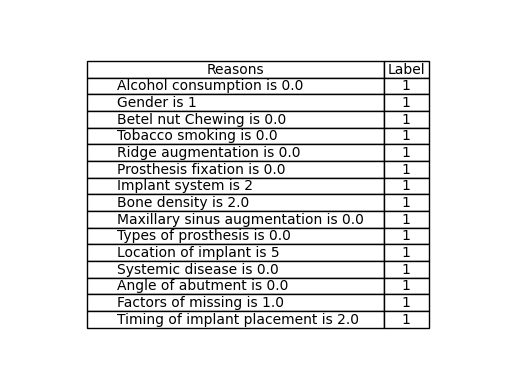

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
212,0,0.0,3.0,0.0,0.0,0.0,5,3.0,2.0,0.0,0.0,1,0.0,0.0,1.0


Index                   : 212
Predicted label         : [1]
Predicted label with RDR: [1.]


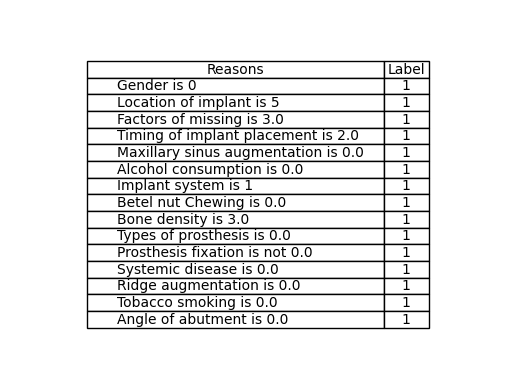

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
362,1,0.0,3.0,1.0,0.0,0.0,5,3.0,2.0,0.0,0.0,0,0.0,0.0,0.0


Index                   : 362
Predicted label         : [1]
Predicted label with RDR: [1.]


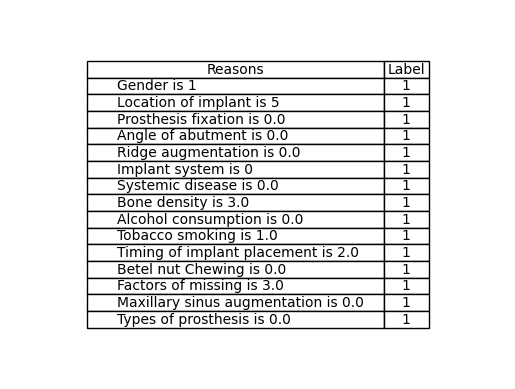

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
709,0,0.0,1.0,0.0,0.0,0.0,5,2.0,2.0,0.0,0.0,1,0.0,0.0,0.0


Index                   : 709
Predicted label         : [1]
Predicted label with RDR: [1.]


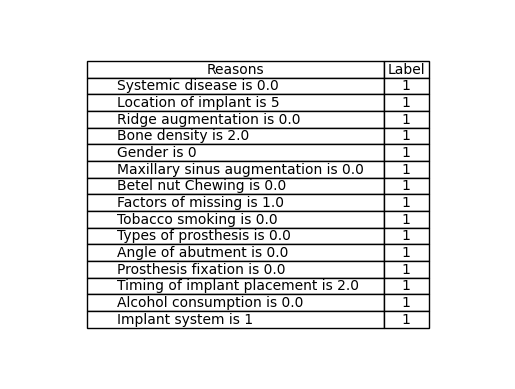

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
438,1,1.0,1.0,0.0,0.0,0.0,0,3.0,1.0,0.0,0.0,1,0.0,1.0,0.0


Index                   : 438
Predicted label         : [1]
Predicted label with RDR: [1.]


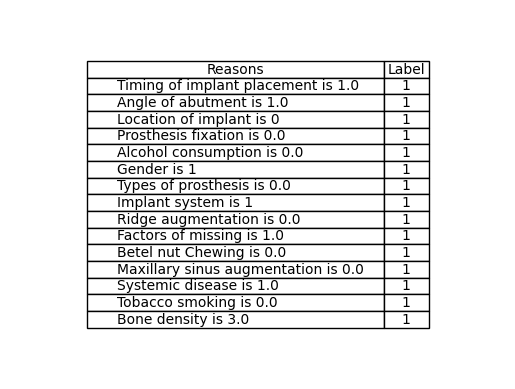

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
45,0,0.0,2.0,0.0,0.0,0.0,5,2.0,2.0,1.0,0.0,1,0.0,0.0,0.0


Index                   : 45
Predicted label         : [1]
Predicted label with RDR: [1.]


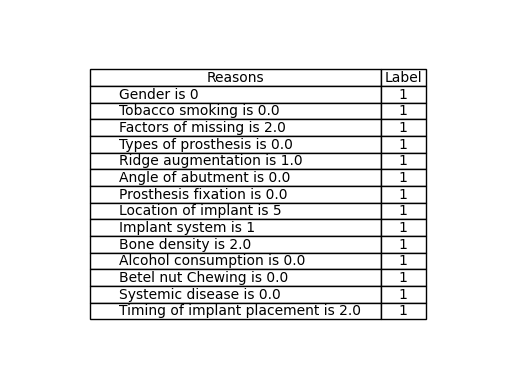

,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Location of implant,Bone density,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Types of prosthesis,Angle of abutment,Prosthesis fixation
491,0,0.0,1.0,0.0,0.0,0.0,0,3.0,2.0,1.0,0.0,0,0.0,0.0,0.0


Index                   : 491
Predicted label         : [1]
Predicted label with RDR: [1.]


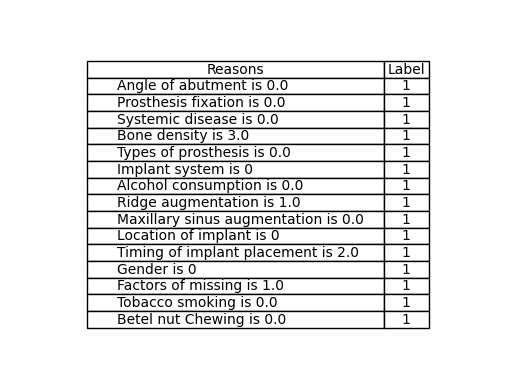

In [28]:
for idx in sample.index:
    display(sample.loc[[idx]])
    print(f"Index                   : {idx}")
    print(f"Predicted label         : {rf.predict(sample.loc[[idx]])}")
    print(f"Predicted label with RDR: {rf_rdr.predict(sample.loc[[idx]])}")
    output, reason, cornerstone = rf_rdr.explain_instance(sample.loc[[idx]])